# Effects of Car Features on Price
## by Robert Bruton

## Investigation Overview

The goal of this project was to look at the relationships between car features and price and determine which features had the greatest effect on value.

## Dataset Overview

The dataset for this project was compiled from data originally scraped from Edmunds and Twitter. The dataset contains 16 columns of variables for nearly 12,000 rows of vehicles. The features contained in the columns include some numeric variables (production year, horsepower, highway gas mileage, city gas mileage, popularity, and price) and some categorical variables (fuel type, number of engine cylinders, transmission type, drive wheels, number of doors, vehicle size, and body style), as well as columns of strings specifying the vehicle model and the vehicle class (both of which were ignored). The dataset was cleaned for quality prior to analysis by dropping unnecessary columns and any rows with important missing values. The cleaned data set contained 15 columns and 9197 entries with vehicles from 2001 to 2017 ranging in price from \\$5,000 to \$75,000 dollars.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe (use cleaned dataset instead of original)

cars = pd.read_csv('cars_final.csv')

## Distribution of Vehicle Prices

The prices of vehicles in the dataset have a large range from \\$5,000 to \\$75,000. The distribution is unimodal with a median of \\$31,040. The distribution is skewed right and has a mean of \$33,420.

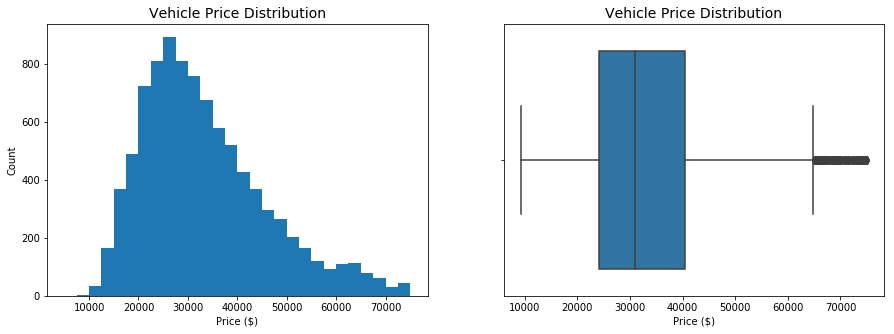

In [3]:
# Plot histogram and boxplot of price distribution

plt.figure(figsize=[15, 5])

bins=np.arange(5000, 77500, 2500)
plt.subplot(1,2,1)
plt.hist(data=cars, x='price', bins=bins)
plt.xlabel('Price ($)')
plt.ylabel('Count')
plt.title('Vehicle Price Distribution', fontsize=14)

plt.subplot(1,2,2)
sb.boxplot(cars.price)
plt.title('Vehicle Price Distribution', fontsize=14)
plt.xlabel('Price ($)');

## Price vs Horsepower

The feature most closely correlated with vehicle price is the horsepower. These variables had a correlation coefficient of 0.781. This scatter plot clearly shows a relationship where increasing horsepower tends to mean increasing price.

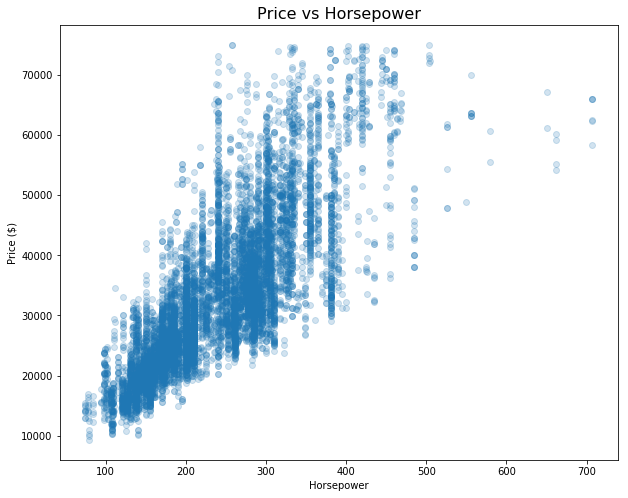

In [4]:
# Scatterplot of price vs horsepower

plt.figure(figsize = [10, 8])
plt.scatter(data=cars, x='hp', y='price', alpha = 0.2)
plt.xlabel('Horsepower')
plt.ylabel('Price ($)')
plt.title('Price vs Horsepower', fontsize=16);

## Mean Price vs Model Year

There is also a correlation between price and model year of the vehicle. Newer models of cars tend to be more expensive than previous years in general. This correlation is not as strong as that between price and horsepower though, with a correlation coefficient of only 0.303. This bar plot of the mean price by model year shows this relationship pretty clearly but the fairly large standard deviation error bars show that the values are quite variable and the correlation is not very strong.

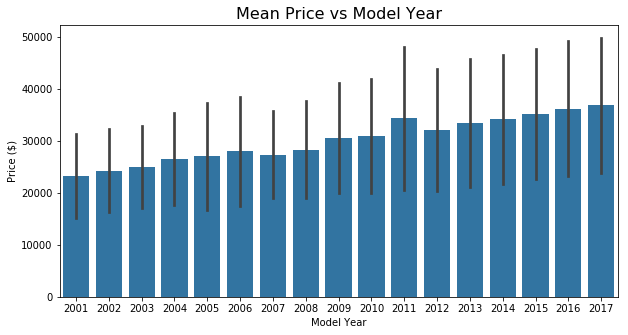

In [5]:
# Bar graph of mean price vs model year with standard deviation error bars

plt.figure(figsize=[10, 5])
default_color = sb.color_palette()[0]
sb.barplot(data=cars, x='year', y='price', ci='sd', color = default_color)
plt.title('Mean Price vs Model Year', fontsize=16)
plt.xlabel('Model Year')
plt.ylabel('Price ($)');

## Price Distribution by Make

As shown in this box plot of price distribution by vehicle make, the price is related to make. Some makes have very large price distribution ranges which weakens the relationship, but some makes have quite small ranges and thus there is a strong relationship with price for these makes. Overall, the make is often a factor in vehicle pricing.

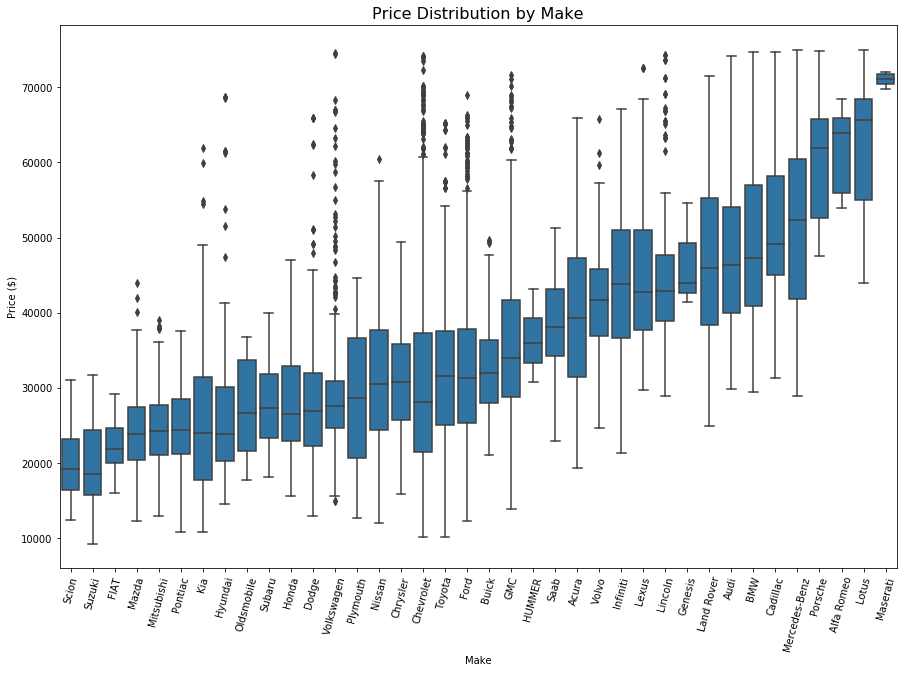

In [6]:
# Box plot of price vs make ordered by mean

order = cars.groupby('make')['price'].mean().sort_values(ascending=True).index

plt.figure(figsize = [15, 10])

sb.boxplot(data = cars, x = 'make', y = 'price', color = default_color,  order = order)
plt.xticks(rotation = 75)
plt.title('Price Distribution by Make', fontsize=16)
plt.ylabel('Price ($)')
plt.xlabel('Make');

## Price vs Transmission Type, Drive Wheels, and Vehicle Size

The bar plots of the mean price for these categorical variables shows some relationship. The standard deviation error bars indicate a good deal of variablility which suggests that while these variables may have some impact on the price, the relationship may not be very strong and may be depending on other factors. Based on these plots, it seems that vehicles with manual transmissions tend to be cheapest, as do front wheel drive vehicles, and the plot of mean price by vehicle size shows a clear correlation between increasing vehicle size and increasing price.

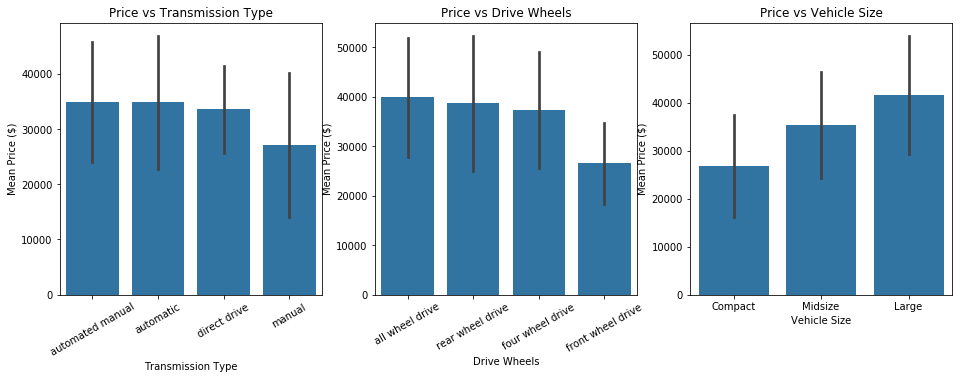

In [7]:
# Bar plots of price vs transmission type, drive wheels, and vehicle size

plt.figure(figsize = [16, 5])
default_color = sb.color_palette()[0]

plt.subplot(1,3,1)
sb.barplot(data = cars, x = 'trans', y = 'price', color = default_color, ci='sd',
          order = cars.groupby('trans')['price'].mean().sort_values(ascending=False).index)
plt.xticks(rotation=30)
plt.xlabel('Transmission Type')
plt.ylabel('Mean Price ($)')
plt.title('Price vs Transmission Type')

plt.subplot(1,3,2)
sb.barplot(data = cars, x = 'drive', y = 'price', color = default_color, ci='sd',
          order = cars.groupby('drive')['price'].mean().sort_values(ascending=False).index)
plt.xticks(rotation=30)
plt.xlabel('Drive Wheels')
plt.ylabel('Mean Price ($)')
plt.title('Price vs Drive Wheels')

plt.subplot(1,3,3)
sb.barplot(data = cars, x = 'vsize', y = 'price', color = default_color, ci='sd')
plt.xlabel('Vehicle Size')
plt.ylabel('Mean Price ($)')
plt.title('Price vs Vehicle Size');

## Price vs Number of Cylinders and Fuel Type

Some of the categorical variables besides make tend to affect the vehicle price. Two of the categorical variables with the clearest effect on price are the number of engine cylinders and the type of fuel the vehicle uses. In general, vehicles with engines with more cylinders (usually meaning larger engines) tend to be more expensive than those with less cylinders. There is also a trend that vehicles using either regular unleaded fuel or flex-fuel tend to be cheaper than those using premium unleaded or diesel fuel.

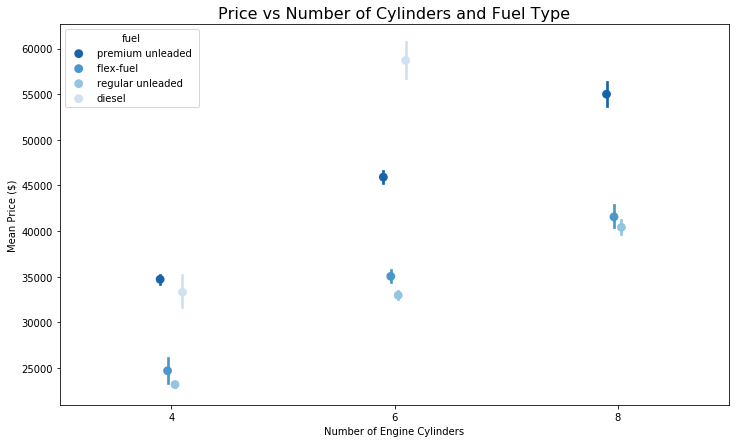

In [8]:
# Point plot of mean price by cylinders and fuel type
# Filter df to have only most common numbers of cylinders and conventional fuel types
cyls = [4, 6, 8]
fuels= ['premium unleaded', 'regular unleaded', 'flex-fuel', 'diesel']

cars2 = cars[(cars.cylinders.isin(cyls)) & (cars.fuel != 'natural gas')]

fig = plt.figure(figsize = [12,7])
ax = sb.pointplot(data = cars2, x = 'cylinders', y = 'price', hue = 'fuel',
           palette = 'Blues_r', linestyles = '', dodge = 0.1)
plt.title('Price vs Number of Cylinders and Fuel Type', fontsize=16)
plt.ylabel('Mean Price ($)')
plt.xlabel('Number of Engine Cylinders');